In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [105]:
n = 1000
l_bound = -5
u_bound = 5
center = [(u_bound-l_bound)/2]*3
particles = np.random.uniform(l_bound, u_bound, size=(n,3))

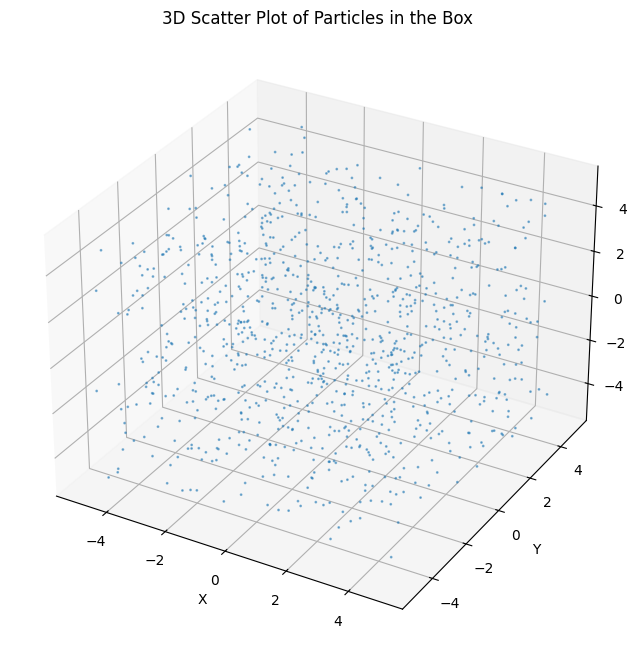

In [106]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(particles[:, 0], particles[:, 1], particles[:, 2], s=1, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Particles in the Box')
plt.show()

In [107]:
volume_len = np.linspace(0.001, u_bound, n)
volumes = (2*volume_len)**3
mass = 1
counts = []

for vol in volume_len:
    count = np.sum(np.logical_and.reduce((
        np.abs(particles[:, 0]) <= vol,
        np.abs(particles[:, 1]) <= vol,
        np.abs(particles[:, 2]) <= vol
    )))
    counts.append(count)

density = np.array(counts)*mass / volumes

In [108]:
sigma = (u_bound - l_bound)/ 6  
particles_inhomogeneous = np.vstack((
    -u_bound + 2 * u_bound * np.random.rand(n//2, 3), 
    2 + np.random.randn(n//2, 3)
))

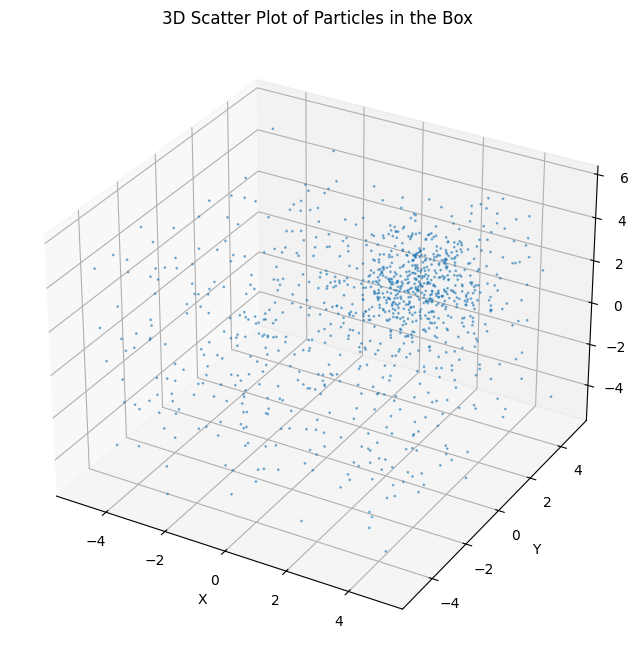

In [109]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(particles_inhomogeneous[:, 0], particles_inhomogeneous[:, 1], particles_inhomogeneous[:, 2], s=1, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Particles in the Box')
plt.show()

In [110]:
counts_inhomogeneous = []

for vol in volume_len:
    count_inhomogeneous = np.sum(np.logical_and.reduce((
        np.abs(particles_inhomogeneous[:, 0]) <= vol,
        np.abs(particles_inhomogeneous[:, 1]) <= vol,
        np.abs(particles_inhomogeneous[:, 2]) <= vol
    )))
    counts_inhomogeneous.append(count_inhomogeneous)

density_inhomogeneous = np.array(count_inhomogeneous) / volumes

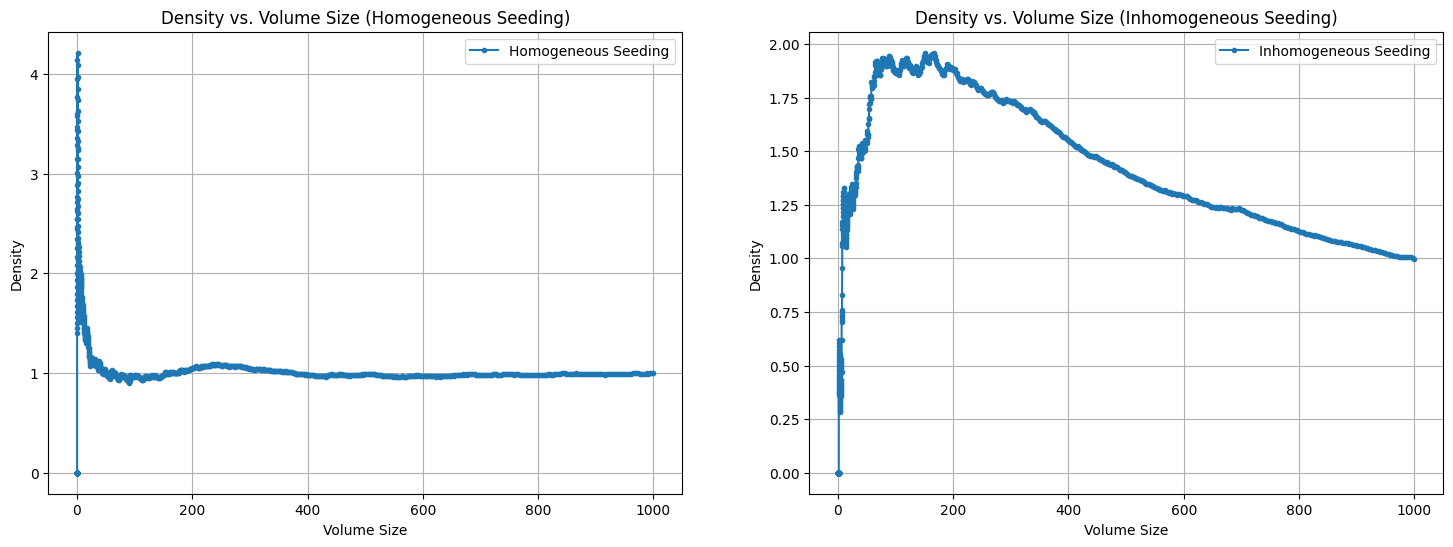

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].plot(volumes, density, marker='.', label='Homogeneous Seeding')
axes[0].set_xlabel('Volume Size')
axes[0].set_ylabel('Density')
axes[0].set_title('Density vs. Volume Size (Homogeneous Seeding)')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(volumes, np.array(counts_inhomogeneous) / volumes, marker='.', label='Inhomogeneous Seeding')
axes[1].set_xlabel('Volume Size')
axes[1].set_ylabel('Density')
axes[1].set_title('Density vs. Volume Size (Inhomogeneous Seeding)')
axes[1].grid(True)
axes[1].legend()

plt.show()